In [1]:
import sys
sys.path.append("/home/woonho/python/1st-AD-SW-Competition/road_following")

from Algorithm.img_preprocess import total_function, cvt_binary
import os
import cv2
from utility import preprocess, roi_cutting, dominant_gradient, return_road_direction
from glob import glob
import torch
from Algorithm.Control import total_control, strengthen_control
from Networks.model import ResNet18


In [20]:
img_path = "/hdd/woonho/autonomous_driving/rfdata/0115/"

img_idx = 107
direction = 4
img_list = glob(img_path + "f_bird--a{}*.png".format(direction))
print(img_list[img_idx])
image = cv2.imread(os.path.join(img_path, img_list[img_idx]))
roi_img = roi_cutting(cvt_binary(image))
preprocess_img = roi_cutting(total_function(image))

# model = ResNet18(weight_file="../model_weight_file/best_steering_model_0116.pth")

/hdd/woonho/autonomous_driving/rfdata/0115/f_bird--a4s30--1673615813.1372254--8b2c825f-9344-11ed-bd3c-41fa17627ac1.png


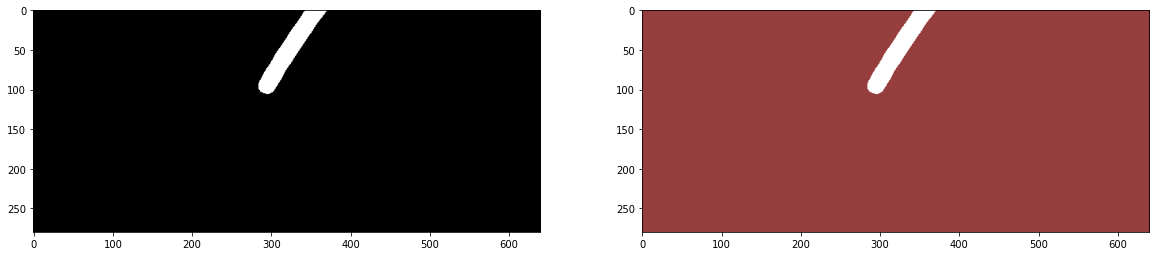

In [21]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 10))
plt.subplot(121)
plt.imshow(roi_img, cmap = 'gray')
plt.subplot(122)
plt.imshow(preprocess_img)

plt.show()


In [22]:

gradient, road_bottom_value = dominant_gradient(roi_img, preprocess_img)
road_direction = return_road_direction(gradient)
# model_direction = torch.argmax(model.run(preprocess(roi_img, mode = "test"))).item() - 7
final_direction = strengthen_control(road_direction, road_bottom_value)
print("road_direction : {}".format(road_direction))
print("final_direction : {}".format(final_direction))
print("Answer_direction : {}".format(direction))

road_direction : 6
final_direction : 7
Answer_direction : 4


In [23]:
import numpy as np
from utility import find_nearest
print(road_bottom_value)
print(find_nearest(road_bottom_value, 320))

[147 154 160 165 170 174 181 186 191 196]
(196, None)
